In [4]:
import numpy as np
import matplotlib.pylab as plt
import pickle

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

# 从感知机到神经网络

感知机缺点：设定权重的工作，即确定合适的、能符合预期的输入与输出的权重，现在还是由人工进行的。

神经网络的一个重要性质是它可以自动地从数据中学习到合适的权重参数。

本章中，我们先介绍神经网络的概要，然后重点关注神经网络进行识别时的处理。在下一章中，将了解如何从数据中学习权重参数。

<img src="img/3_1.png" alt="Drawing" style="width: 300px;"/>

- 我们把最左边的一列称为
输入层，最右边的一列称为输出层，中间的一列称为中间层。
- 中间层有时也称为隐藏层。“隐藏”一词的意思是，隐藏层的神经元（和输入层、输出
层不同）肉眼看不见。
- 本书中把输入层到输出层依次称为第0层、第
1层、第2层（层号之所以从0开始，是为了方便后面基于Python进行实现）。

神经网络的形状类似上一章的感知机。实际上，就神经元的连接方式而言，与上一章的感知机并没有任何差异。
<img src="img/3_2.png" alt="Drawing" style="width: 300px;"/>


那么，神经网络与感知机差异和关系式什么？神经网络中信号是如何传递的呢？

简单理解:
- 神经网络是由感知机组成，激活函数是连接感知机和神经网络的桥梁。
- 一般而言，“朴素感知机”是指单层网络，指的是激活函数使用了阶跃函数的模型。(阶跃函数后面讲到)
- “多层感知机”是指神经网络，即使用 sigmoid函数（后述）等平滑的激活函数的多层网络。

<img src="img/3_4.png" alt="Drawing" style="width: 300px;"/>

神经元的○中明确显示了激活函数的计算过程，即信号的加权总和为节点a，然后节点a被激活函数h()转换成节点y。

<img src="img/3_5.png" alt="Drawing" style="width: 300px;"/>


# 激活函数

会将输入信号的总和转换为输出信号，这种函数一般称为激活函数（activation function）。

如“激活”一词所示，激活函数的作用在于决定如何来激活输入信号的总和。

感知机中使用了阶跃函数作为激活函数;

<img src="img/formula_3_3.png" alt="Drawing" style="width: 500px;"/>

- 式（3.3）表示的激活函数以阈值为界，一旦输入超过阈值，就切换输出。


如果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。

其他常见的激活函数：
- sigmoid函数
- ReLU函数

接下来我们拉看具体的实现：

## 阶跃函数

In [11]:
# 阶跃函数
def step_function(x):
    return np.array(x>0, dtype='int')

(-0.1, 1.1)

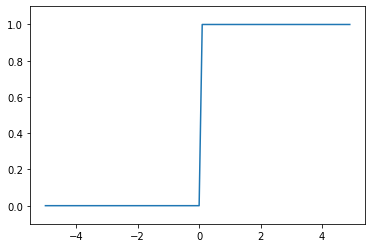

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

阶跃函数以0为界，输出从0切换为1（或者从1切换为0）。
它的值呈阶梯式变化，所以称为阶跃函数。

In [13]:
x = np.array([-1.0, 1.0, 2.0])
x
y = x > 0
y

array([-1.,  1.,  2.])

array([False,  True,  True])

## sigmoid函数

神经网络中经常使用的一个激活函数就是sigmoid函数（sigmoid function）。

公式如下：

$$sigmoid =  \frac{1}{1-e^x}$$

图形如下：

<img src="img/3_7.png" alt="Drawing" style="width: 300px;"/>


sigmoid函数的平滑性对神经网络的学习具有重要意义。

向sigmoid函数输入1.0或2.0后，就会有某个值被输出，类似h(1.0) = 0.731 ...、h(2.0) = 0.880 ...这样。

如下代码：np.exp()函数是求 $e^x$ 的值的函数


(-0.1, 1.1)

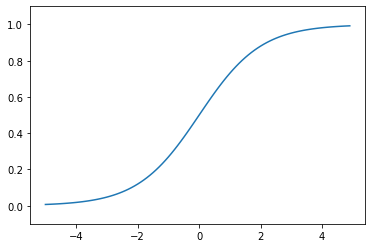

In [14]:
def sigmoid(x):
    return  1 / (1 + np.exp(-x)) 

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()


### sigmoid函数和阶跃函数的比较

#### 区别
1. 首先注意到的是“平滑性”的不同。sigmoid函数是一条平滑的曲线，输出随着输入发生连续性的变化。而阶跃函数以0为界，输出发生急剧性的变化;
2. 相对于阶跃函数只能返回0或1，sigmoid函数可以返回0.731 ...、0.880 ...等实数（这一点和刚才的平滑性有关）。也就是说，感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号;

#### 共性
1. 两者的结构均是“输入较小时，输出接近0（为0）；随着输入增大，输出向1靠近（变成1）”。也就是说，当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值；
2. 不管输入信号有多小，或者有多大，输出信号的值都在0到1之间；
3. 两者均为非线性函数；（线性函数是一条笔直的直线。而非线性函数，顾名思义，指的是不像线性函数那样呈现出一条直线的函数。）

    知识点补充：神经网络的激活函数必须使用非线性函数。换句话说，激活函数不能使
用线性函数。为什么不能使用线性函数呢？因为使用线性函数的话，加深神
经网络的层数就没有意义了。
线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无
隐藏层的神经网络”。为了具体地（稍微直观地）理解这一点，我们来思
考下面这个简单的例子。这里我们考虑把线性函数 h(x) = cx 作为激活
函数，把y(x) = h(h(h(x)))的运算对应3层神经网络A。这个运算会进行
y(x) = c × c × c × x的乘法运算，但是同样的处理可以由y(x) = ax（注意，
a = c 3
）这一次乘法运算（即没有隐藏层的神经网络）来表示。如本例所示，
使用线性函数时，无法发挥多层网络带来的优势。因此，为了发挥叠加层所
带来的优势，激活函数必须使用非线性函数。

## ReLU函数

在神经网络发展的历史上，sigmoid函数很早就开始被使用了，而最近则主要使用ReLU（Rectified Linear Unit）函数。

ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输出0，如下公式：

<img src="img/formula_3_7.png" alt="Drawing" style="width: 500px;"/>


(-1.0, 5.5)

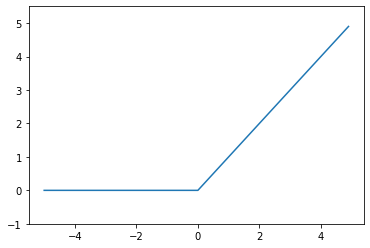

In [16]:
def relu(x):
    return np.maximum(0,x)

# maximum函数会从输入的数值中选择较大的那个值进行输出。

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## 插播知识点：多维数组的运算

如果掌握了NumPy多维数组的运算，就可以高效地实现神经网络。

In [26]:
A = np.array([1, 2, 3, 4])
print(np.ndim(A))
print(A.shape)

1
(4,)


In [15]:
B = np.array([[1,2], [3,4], [5,6]])
print(np.ndim(B))
print(B.shape)

2
(3, 2)


In [17]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)

# cc：np.dot()接收两个NumPy数组作为参数，并返回数组的乘积。
# 这里要注意的是，np.dot(A, B)和np.dot(B, A)的值可能不一样。
# 和一般的运算（+或*等）不同，矩阵的乘积运算中，操作数（A、 B）的顺序不同，结果也会不同。
# 在多维数组的乘积运算中，必须使两个矩阵中的对应维度的元素个数一致，这一点很重要！

array([[19, 22],
       [43, 50]])

案例：使用NumPy矩阵来实现神经网络

<img src="img/3_14.png" alt="Drawing" style="width: 500px;"/>


In [20]:
# 神经网络的内积
X = np.array([1, 2])
X
X.shape

W = np.array([[1, 3, 5], [2, 4, 6]])
W
W.shape

Y = np.dot(X, W)
Y
Y.shape

array([1, 2])

(2,)

array([[1, 3, 5],
       [2, 4, 6]])

(2, 3)

array([ 5, 11, 17])

(3,)

# 3层神经网络的实现

先快速了解以下符号表示：

<img src="img/3_16.png" alt="Drawing" style="width: 300px;"/>

- 权重和隐藏层的神经元的右上角有一个“(1)”，它表示权重和神经元的层号（即第1层的权重、第1层的神经元）。
- 权重的右下角有两个数字，
    - 第一个数字：后一层的神经元的索引号
    - 第二个数据：前一层的神经元的索引号


这里我们以图3-15的3层神经网络为对象，实现从输入到输出的（前向）处理。如图：

<img src="img/3_15.png" alt="Drawing" style="width: 300px;"/>



## 从输入层到第1层的信号传递

<img src="img/3_17.png" alt="Drawing" style="width: 300px;"/> 

考虑激活函数的表示：

<img src="img/3_18.png" alt="Drawing" style="width: 300px;"/>




In [27]:
# 用NumPy多维数组来实现式
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1
print(A1) # [0.3, 0.7, 1.1]

# 第1层中激活函数的计算过程
Z1 = sigmoid(A1)
print(Z1) # [0.57444252, 0.66818777, 0.75026011]


(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


## 第1层到第2层的信号传递

<img src="img/3_19.png" alt="Drawing" style="width: 300px;"/>


In [29]:
# 这个实现和刚才的代码完全相同。
# 由此可知，通过使用NumPy数组，可以将层到层的信号传递过程简单地写出来。

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


## 从第2层到输出层的信号传递


<img src="img/3_20.png" alt="Drawing" style="width: 300px;"/>

输出层的实现也和之前的实现基本相同。不过，最后的激活函数和之前的隐藏层有所不同。


这里我们定义了identity_function()函数（也称为“恒等函数”），并将其作为输出层的激活函数。
恒等函数会将输入按原样输出，因此，这个例子中没有必要特意定义identity_function()。这里这样实现只是为了和之前的流程保持统一。

另外，图3-20中，输出层的激活函数用σ()表示，不同于隐
藏层的激活函数h()（σ读作sigma）。

In [30]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
print(A3)
Y = identity_function(A3) # 或者Y = A3
print(Y)


[0.31682708 0.69627909]
[0.31682708 0.69627909]


## 代码实现汇总

In [31]:
# 权重和偏置的初始化，并将它们保存在字典变量network中。
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

# 定义恒等函数
def identity_function(x):
    return x

# 封装了将输入信号转换为输出信号的处理过程。
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

# 调用函数
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


总结一下思路，每一层有两个步骤计算：
1. 先做线性计算；
2. 再做激活函数计算；（在最后的输出层，这里暂时使用了恒定函数，后面还有其他函数）

# 输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。

一般而言，回归问题用恒等函数，分类问题用softmax函数。

恒等函数不用多说了，在输出层使用恒等函数时，输入信号会原封不动地被输出。在上面代码我们也见到过。这里主要来介绍softmax函数

## softmax 函数
公式：

<img src="img/formula_3_10.png" alt="Drawing" style="width: 500px;"/>

- ak就是经过点积之后最后要output的值，在output之前需要经过softmax函数的处理；
- exp(x)是表示ex的指数函数（e是纳皮尔常数2.7182 ...）。
- 公式表示假设输出层共有n个神经元，计算第k个神经元的输出yk。
- 如公所示，softmax函数的分子是输入信号ak的指数函数，分母是所有输入信号的指数函数的和。
    - （其实简单理解就是每个分类的占比，总和为1）
    
- 如下图：softmax函数的输出通过箭头与所有的输入信号相连
    
<img src="img/3_22.png" alt="Drawing" style="width: 500px;"/>


**softmax 函数的意义/目的**
1. 输出y 加总之后和为1。。。。，这是为了归一化？？？
2. 可能和求导有关。。。

**softmax 函数的特性**
1. softmax函数的输出是0.0到1.0之间的实数。并且，softmax 函数的输出值的总和是1。因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”。
2. 各个元素之间的大小关系也不会改变。这是因为指数函数（y = exp(x)）是单调递增函数。比如，a的最大值是第2个元素，y的最大值也仍是第2个元素。神经网络只把输出值最大的神经元所对应的类别作为识别结果。


In [32]:
# softmax 内部实现测试
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数函数
print(exp_a)

sum_exp_a = np.sum(exp_a) # 指数函数的和
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [34]:
# 一般softmax函数溢出问题
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算，发现会有warning提示：overflow

# 解决溢出问题
c = np.max(a) # 1010
a - c
np.exp(a - c) / np.sum(np.exp(a - c)) # 这样就解决了溢出问题！

<ipython-input-34-2ee7f1f30449>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算，发现会有warning提示：overflow
<ipython-input-34-2ee7f1f30449>:3: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算，发现会有warning提示：overflow


array([nan, nan, nan])

array([  0, -10, -20])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [24]:
# softmax 封装
def softmax_old(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 优化：解决 溢出问题
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 解决溢出，加入一个常数（为负数），因为是分子分母同乘对结果没有影响；但是可以解决分子过大导致溢出问题；
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))


[0.01821127 0.24519181 0.73659691]
1.0


[7.80134161e-05 2.12062451e-04 5.76445508e-04 1.56694135e-03
 4.25938820e-03 1.15782175e-02 3.14728583e-02 8.55520989e-02
 2.32554716e-01 6.32149258e-01]
[0.         0.02222222 0.04444444 0.06666667 0.08888889 0.11111111
 0.13333333 0.15555556 0.17777778 0.2       ]


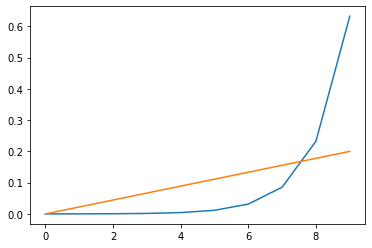

In [32]:
# 多分类，对比softmax与线性的求和表现

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

x = np.arange(10)
e = softmax(x)
print(e)
f = x/np.sum(x)
print(f)

plt.plot(x, e, x, f)

# 总结：softmax 能够很明显体现出最大值。

# 案例：利用神经网络进行“手写数字识别”

In [38]:
# MNIST数据集 导入

import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 参数normalize设置是否将输入图像正规化为0.0～1.0的值，这里没有设置，待会儿打印的数据可以直观看到；

# 参数flatten设置是否展开输入图像（变成一维数组）。如果将该参数设置为False，则输入图像为1 × 28 × 28的三维数组；若设置为True，则输入图像会保存为由784个元素构成的一维数组。
# 所以在这边就可以类似下面reshape的操作，转换成28×28的数组，这里为啥是三维数组？为啥多了一维？

# 参数one_hot_label设置是否将标签保存为one-hot表示（one-hot representation）。
# one-hot表示是仅正确解标签为1，其余皆为0的数组，就像[0,0,1,0,0,0,0,0,0,0]这样。当one_hot_label为False时，只是像7、2这样简单保存正确解标签；当one_hot_label为True时，标签则保存为one-hot表示。

img = x_train[0] # x_train 中第一个图像元素的数据
label = t_train[0] # 第一个图像元素的label，这里为 5
print(label)  # 5，通过上面 one_hot_label 参数，可以设置为one-hot格式；

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [13]:
# cc
img2 = x_test[0]
print(img2.shape)
img2 = img2.reshape(28, 28) # 所以 reshape这一步还是非常重要的。
print(img2.shape)

# img_show(img2)

# 这里也就明白了，一条：比如x_train[0] 数据表示一张图片；
# 而x_train[0] 是 1×784 的结构，在reshape成28×28后，就形成了正方形排布的像素点；
# 之后再通过 img_show 转换成图像；

print(x_train.shape) # 而x_train 总共有60000个这样的图片；
print(x_test.shape) # x_test 总共有10000个这样的图片；

(784,)
(28, 28)
(60000, 784)
(10000, 784)


In [45]:
# 神经网络的推理处理

import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) # sigmoid 做激活函数
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) # softmax 做输出函数

    return y

x, t = get_data()
print(x.shape) # 10000张图片，每张图片28*28像素
print(t.shape) # 10000张图片对应的标签

network = init_network()
accuracy_cnt = 0
for i in range(len(x)): # 一共有len(x)个图片，就进行这些次的循环来求精度；
    y = predict(network, x[i]) # 每个x在0~9的概率
    p= np.argmax(y) # 获取概率最高的元素的索引，cc：刚好这里索引对应的就是数字
    if p == t[i]: # 然后和t[i]的标签进行对比；t现在还不是one-hot，就是某个值；
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


# 使用normalize=True 正规化数据之后，
# 1. 精度由 0.9207变化到 0.9352
# 2. 没有正规化数据的话，计算log会有问题，提示：overflow encountered in exp


(10000, 784)
(10000,)
Accuracy:0.9352


In [27]:
# cc：test
def get_data2(normalize=False, flatten=False, one_hot_label=False):
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=normalize, flatten=flatten, one_hot_label=one_hot_label)
    return x_test, t_test

test_x, test_t = get_data2(normalize=True, flatten=False)



In [37]:
test_x.shape

(10000, 1, 28, 28)

In [35]:
import pandas as pd
a = test_x[0].reshape(28, 28)
pd.DataFrame(a)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.329412,0.725490,0.623529,0.592157,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.870588,0.996078,0.996078,0.996078,...,0.776471,0.776471,0.666667,0.203922,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.262745,0.447059,0.282353,0.447059,...,0.898039,0.996078,0.996078,0.549020,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# cc
network['b2'].shape

(100,)

### 批处理

In [54]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # for循环每次取100个，而不是每次取1个
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # 和上面的结果一致

Accuracy:0.9352


In [55]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']


In [58]:
x.shape

W1.shape

W2.shape

W3.shape

(10000, 784)

(784, 50)

(50, 100)

(100, 10)

In [63]:
x, t = get_data()
network = init_network()

batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]    
    y_batch = predict(network, x_batch) # predict 里面点积在x 变为二维之后依然成立；
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

# 得到的结果和 不用批处理的结果一致；
# 不用批处理的话，相当于迭代10000次，使用了批处理迭代了100次，在每次迭代中用矩阵多维计算方法实现批处理！！！


Accuracy:0.9352


In [61]:
for i in range(0, len(x), batch_size):
    print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


## 额外的学习

### 1.关于绝对路径

In [68]:
import os

# 在py文件这样写，但是在notebook不行
# dataset_dir = os.path.dirname(os.path.abspath(__file__))

# 在notebook 要这样写：
base_dir1 = os.path.dirname(os.path.realpath('file'))
print(base_dir)

base_dir2 = os.path.dirname(base_dir1)
print(base_dir2)

base_dir3 = os.path.dirname(base_dir2)
print(base_dir3)

# 获取os的路径
path4 = os.__file__
print(path4)


/Users/matao/study/self_repository/deepLearning/ch03
/Users/matao/study/self_repository/deepLearning
/Users/matao/study/self_repository
/Users/matao/opt/anaconda3/lib/python3.8/os.py


### 2.frombuffer

#### 形式

numpy.frombuffer(buffer, dtype=float, count=-1, offset=0)

#### 解释：

将缓冲区解释为一维数组。

#### 参数

buffer ：buffer_like，公开缓冲区接口的对象。

dtype ：data-type, 可选。返回array的数据类型;默认值:float。

count ：int, 可选。要阅读的条目数。-1表示缓冲区中的所有数据。

offset ：int, 可选。从这个偏移量(以字节为单位)开始读取缓冲区;默认值:0。



In [72]:
s = b'hello world'
print(type(s))
np.frombuffer(s, dtype='S1', count=5, offset=6)


b = np.frombuffer(b'\x01\x02', dtype=np.uint8)
print(b)

c = np.frombuffer(b'\x01\x02\x03\x04\x05', dtype=np.uint8, count=3)
print(c)

<class 'bytes'>
[1 2]
[1 2 3]


### 3. reshape(-1)

In [74]:
c = np.array([1,2,3,4,5,6])
d = c.reshape(-1, 2) # -1 代表“待定”，根据第二个数字（2）再推算得出。
print(c)
print(d)
print(d.shape)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [79]:
# reshape(-1, n) 变成 (total/n, n)

c = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
d = c.reshape(-1, 2)
print(d)

e = c.reshape(-1, 3)
print(e)

f = c.reshape(-1, 5) # 当12个元素并不能重组成 ?×5 的结构是会报错
print(f)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


ValueError: cannot reshape array of size 12 into shape (5)

### 4. 关于one hot实现

In [85]:
X = np.array([1,2,3,1])
print(X.size)

T = np.zeros((X.size, 10))
print(T)

for idx, row in enumerate(T):
    print(idx)
    print(row)
    row[X[idx]] = 1
    print(row)
    

4
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
